# Предобработка данных

In [124]:
import pandas as pd
import numpy as np
import random
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('car_sales.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Проверка корректности типов данных

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [89]:
df['Date'] = pd.to_datetime(df['Date'])

In [90]:
len(df['Customer Name'].unique())

3022

In [91]:
df['Customer Name'] = df['Customer Name'].astype('category')

In [92]:
df['Gender'].value_counts()

,count
Gender,
Male,18798
Female,5108


In [93]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype('bool');

/tmp/ipython-input-46883128.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype('bool');


In [94]:
print(df['Annual Income'].min())
print(df['Annual Income'].max())

10080
11200000


In [95]:
df['Annual Income'].describe()

,Annual Income
count,2.390600e+04
mean,8.308403e+05
std,7.200064e+05
min,1.008000e+04
25%,3.860000e+05
50%,7.350000e+05
75%,1.175750e+06
max,1.120000e+07


In [96]:
df['Dealer_Name'].nunique()

28

In [97]:
df['Phone'] = df['Phone'].astype('category')

df['Dealer_Name'] = df['Dealer_Name'].astype('category')

In [98]:
cols = ['Company', 'Model', 'Engine', 'Transmission', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region']

for col in cols:
  print('*'*100)
  print(f'Число уникальных значений для признака {col} равно {df[col].nunique()}')
  print(f'Мода равна = {df[col].mode()[0]}')
  print(df[col].value_counts())

****************************************************************************************************
Число уникальных значений для признака Company равно 30
Мода равна = Chevrolet
Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64
****************************************************************************************************
Число уникальных значений для признака Model равно 154
Мода равна = Diamante
Model
Diamante         418
Prizm      

In [99]:
col_cat = df.select_dtypes(include = ['category', 'object']).columns
col_num = df.select_dtypes(include = ['number']).columns
col_num

Index(['Annual Income', 'Price ($)'], dtype='object')

In [100]:
for col in col_cat:
  print('*'*100)
  print(f'Число уникальных значений для признака {col} равно {df[col].nunique()}')
  print(f'Мода равна = {df[col].mode()[0]}')
  print(df[col].value_counts())

****************************************************************************************************
Число уникальных значений для признака Car_id равно 23906
Мода равна = C_CND_000001
Car_id
C_CND_023906    1
C_CND_000001    1
C_CND_023890    1
C_CND_023889    1
C_CND_023888    1
               ..
C_CND_000007    1
C_CND_000006    1
C_CND_000005    1
C_CND_000004    1
C_CND_000003    1
Name: count, Length: 23906, dtype: int64
****************************************************************************************************
Число уникальных значений для признака Customer Name равно 3021
Мода равна = Thomas
Customer Name
Thomas            92
Emma              90
Lucas             88
Nathan            80
Louis             76
                  ..
Zelia              1
Zekeriya           1
Abthu-Mustapha     1
Abril              1
Abdjadi            1
Name: count, Length: 3021, dtype: int64
***************************************************************************************************

In [101]:
for i in col_num:
  display(df[i].describe())

,Annual Income
count,2.390600e+04
mean,8.308403e+05
std,7.200064e+05
min,1.008000e+04
25%,3.860000e+05
50%,7.350000e+05
75%,1.175750e+06
max,1.120000e+07


,Price ($)
count,23906.000000
mean,28090.247846
std,14788.687608
min,1200.000000
25%,18001.000000
50%,23000.000000
75%,34000.000000
max,85800.000000


In [102]:
print(col_cat)

for col in col_cat:
  df[col] = df[col].astype('category')

Index(['Car_id', 'Customer Name', 'Dealer_Name', 'Company', 'Model', 'Engine',
       'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Phone',
       'Dealer_Region'],
      dtype='object')


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  category      
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  category      
 3   Gender         23906 non-null  bool          
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  category      
 6   Company        23906 non-null  category      
 7   Model          23906 non-null  category      
 8   Engine         23906 non-null  category      
 9   Transmission   23906 non-null  category      
 10  Color          23906 non-null  category      
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  category      
 13  Body Style     23906 non-null  category      
 14  Phone          23906 non-null  category      
 15  Dealer_Region  2390

In [104]:
(2.9-2.4)/2.9

0.1724137931034483

## Проверка наличия дубликатов и пропусков

In [105]:
df.duplicated().sum()

np.int64(0)

In [106]:
df.duplicated(subset = ['Car_id']).sum()

np.int64(0)

In [107]:
df['Customer Name'].str.lower().str.strip()

,Customer Name
0,geraldine
1,gia
2,gianna
3,giselle
4,grace
...,...
23901,martin
23902,jimmy
23903,emma
23904,victoire


In [108]:
df['Dealer_Region'].isna().sum()

np.int64(0)

In [109]:
df['Dealer_Region'].value_counts()

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


In [110]:
df['Dealer_Region'].str.lower().str.strip()

,Dealer_Region
0,middletown
1,aurora
2,greenville
3,pasco
4,janesville
...,...
23901,pasco
23902,middletown
23903,scottsdale
23904,austin


In [111]:
df['Phone'].isna().sum()

np.int64(0)

In [112]:
df['Phone'].value_counts()

,count
Phone,
7149864,2
6222715,2
8127435,2
8613376,2
6974986,2
...,...
7001916,1
7001840,1
7001557,1


In [113]:
type(df['Phone'][1])

numpy.int64

In [114]:
for i in df.select_dtypes(include = ['category']).columns[:-2]:
  print(i)
  df[i].str.lower().str.strip()

Car_id
Customer Name
Dealer_Name
Company
Model
Engine
Transmission
Color
Dealer_No 
Body Style


In [115]:
df.isna().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [116]:
df[df['Customer Name'].isna()]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,2022-11-05,NaN,True,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


In [117]:
df['Customer Name'].value_counts()

,count
Customer Name,
Thomas,92
Emma,90
Lucas,88
Nathan,80
Louis,76
...,...
Zelia,1
Zekeriya,1
Abthu-Mustapha,1


In [118]:
df = df.dropna()

In [119]:
df.dropna(inplace = True)

In [120]:
df.isna().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [155]:
ind_nan = []

for i in range(3000):
  ind_nan.append(random.randint(0, 23000))

print(len(ind_nan))

3000


In [156]:
df_new = df.copy()

df_new.loc[ind_nan, 'Price ($)'] = np.nan
df_new.loc[[3, 10010, 200, 3767, 3287, 3270, 3915], 'Price ($)'] = 10000000

In [146]:
df.isna().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [147]:
df_new.isna().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [148]:
df['Price ($)'].describe()

,Price ($)
count,23905.000000
mean,28089.540473
std,14788.592495
min,1200.000000
25%,18001.000000
50%,23000.000000
75%,34000.000000
max,85800.000000


In [149]:
df_new['Price ($)'].fillna(df_new['Price ($)'].mean()).describe()

,Price ($)
count,23905.000000
mean,28194.035018
std,17003.256446
min,1200.000000
25%,18501.000000
50%,24000.000000
75%,33100.000000
max,1000000.000000


In [134]:
df_new['Price ($)'].fillna(df_new['Price ($)'].median()).describe()

,Price ($)
count,23905.000000
mean,27900.226647
std,14529.876920
min,1200.000000
25%,18501.000000
50%,23000.000000
75%,33100.000000
max,85800.000000


In [135]:
df_new['Price ($)'].fillna(0).describe()

,Price ($)
count,23905.000000
mean,26963.100523
std,15523.483139
min,0.000000
25%,17450.000000
50%,22001.000000
75%,33100.000000
max,85800.000000


In [157]:
res = pd.concat([df['Price ($)'].describe(), df_new['Price ($)'].fillna(df_new['Price ($)'].mean()).describe(), df_new['Price ($)'].fillna(df_new['Price ($)'].mode()[0]).describe(), df_new['Price ($)'].fillna(df_new['Price ($)'].median()).describe(), df_new['Price ($)'].fillna(0).describe()], axis = 1)
res.columns = ['noNaN', 'mean', 'moda', 'median', '0']
res

,noNaN,mean,moda,median,0
count,23905.000000,2.390500e+04,2.390500e+04,2.390500e+04,2.390500e+04
mean,28089.540473,3.137844e+04,3.027601e+04,3.039356e+04,2.768994e+04
std,14788.592495,1.711804e+05,1.712071e+05,1.712017e+05,1.714785e+05
min,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03,0.000000e+00
25%,18001.000000,1.900000e+04,1.900000e+04,1.900000e+04,1.600000e+04
50%,23000.000000,2.500100e+04,2.200000e+04,2.300000e+04,2.200000e+04
75%,34000.000000,3.137844e+04,3.100100e+04,3.100100e+04,3.100100e+04
max,85800.000000,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07


## Анализ выбросов

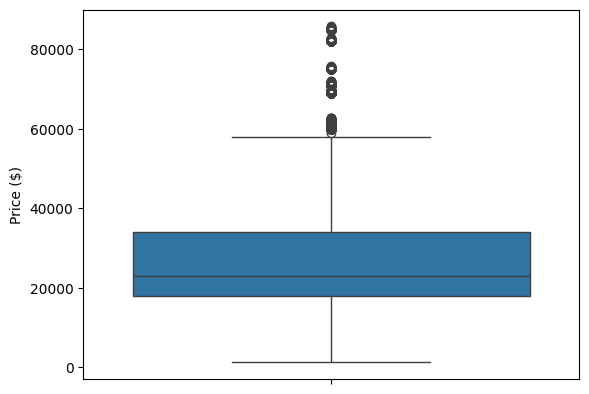

In [159]:
sns.boxplot(df['Price ($)']);

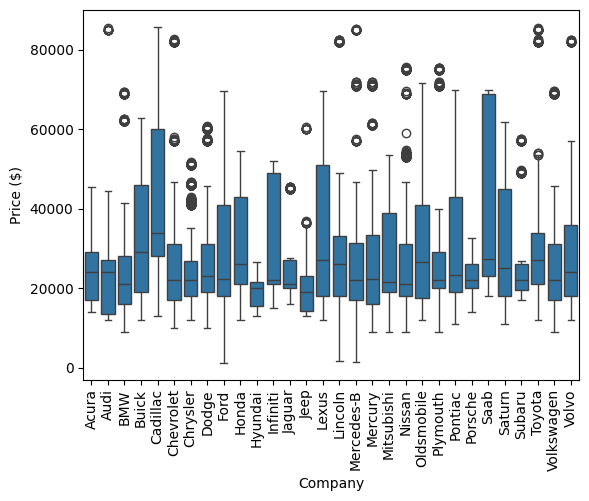

In [163]:
sns.boxplot(df, x="Company", y="Price ($)")
plt.xticks(rotation = 90);

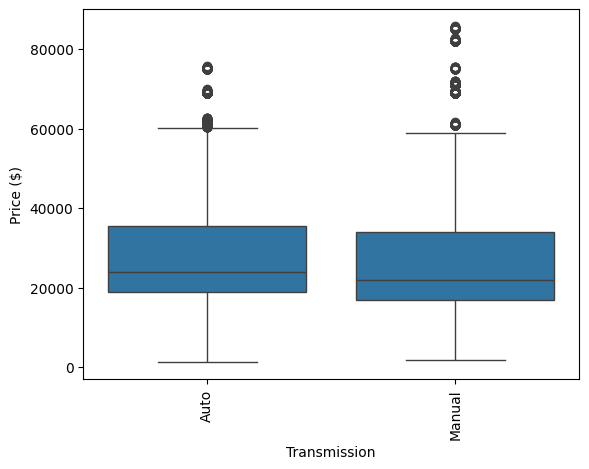

In [164]:
sns.boxplot(df, x="Transmission", y="Price ($)")
plt.xticks(rotation = 90);

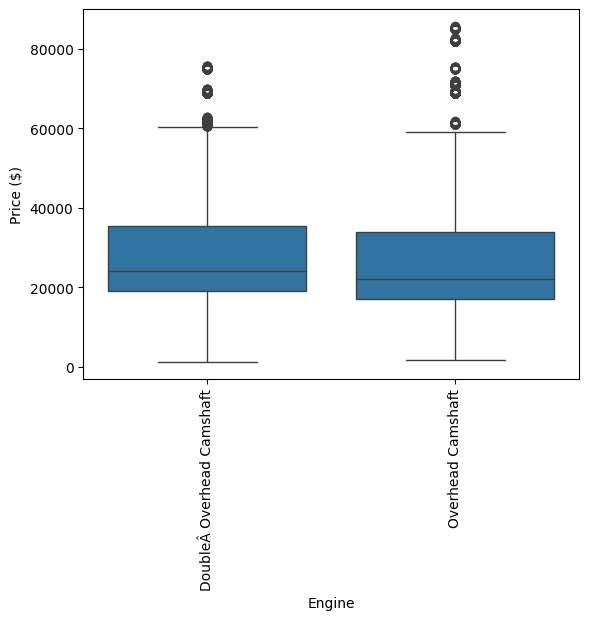

In [165]:
sns.boxplot(df, x="Engine", y="Price ($)")
plt.xticks(rotation = 90);

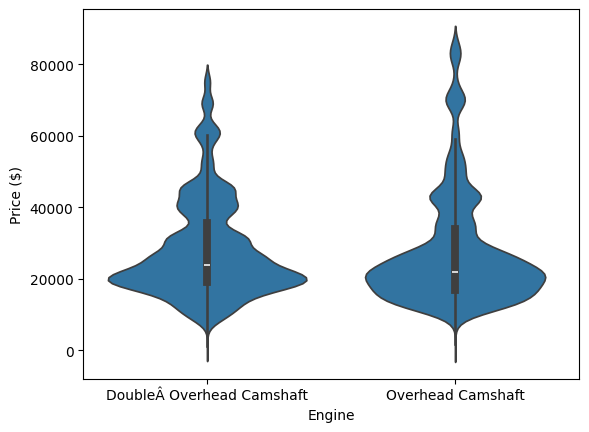

In [167]:
sns.violinplot(df, x="Engine", y="Price ($)");

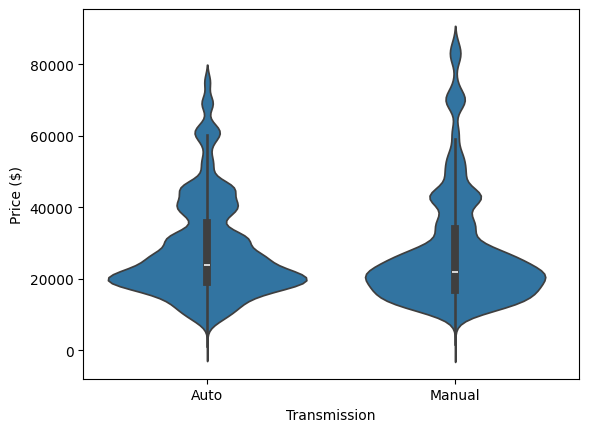

In [168]:
sns.violinplot(df, x="Transmission", y="Price ($)");

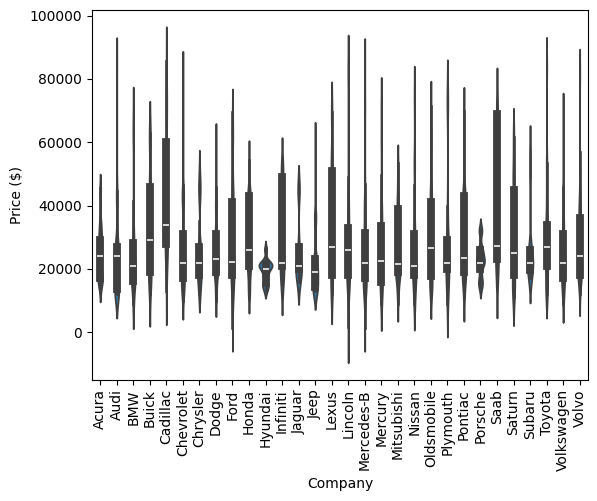

In [170]:
sns.violinplot(df, x="Company", y="Price ($)")
plt.xticks(rotation = 90);

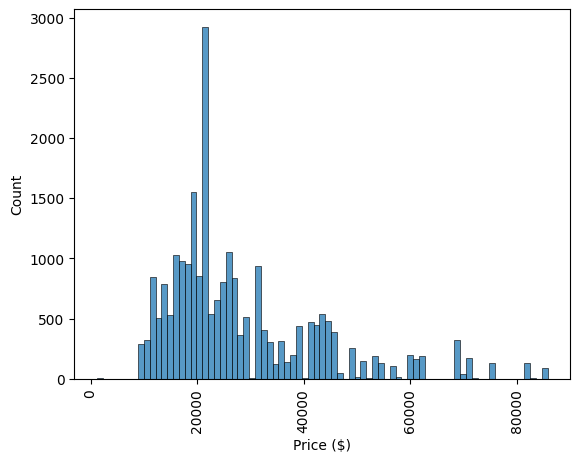

In [174]:
sns.histplot(df["Price ($)"])
plt.xticks(rotation = 90);

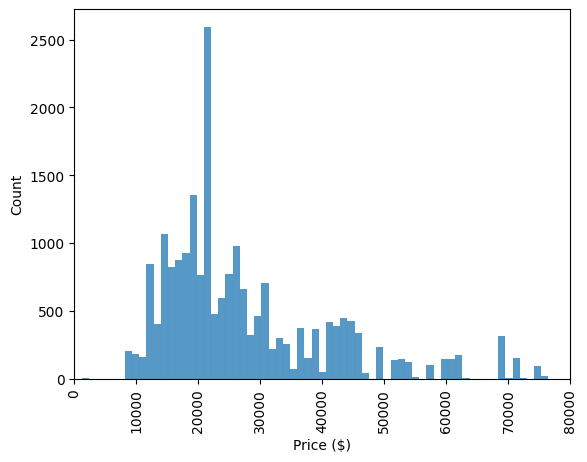

In [176]:
sns.histplot(df_new["Price ($)"])
plt.xticks(rotation = 90)
plt.xlim([0, 80000]);

## Генерация дополнительных признаков и отбор признаков